# Dataset Information
The data set contains 3 classes of 50 instances each,where each classes refers to a type of iris plant. One class is linearly separable from the other 2 :the latter are NOT linearly separable from each other

Attribute Information:

   1)Sepal length in cm
   2)Sepal width in cm
   3)Petal length in cm
   4)Sepal width in cm
   5)Species:- Iris-setosa, Iris-versicolor, Iris Virginica


In [270]:
#IMPORT MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn import svm #SUPPORT VECTOR MACHINE
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [271]:
#Loading the dataset
df = pd.read_csv("C:/Users/abine/OneDrive/Desktop/iris -project/ML_Algorithms_project_ICTA/iris-species/dataset/iris-flower-dataset.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing the dataset

In [272]:
#To display stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [273]:
#To get basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [274]:
#To display no of samples on each class
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [275]:
#Check for the null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

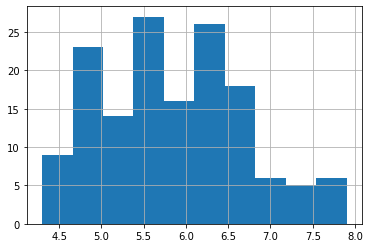

In [276]:
#Histograms
df['sepal_length'].hist()

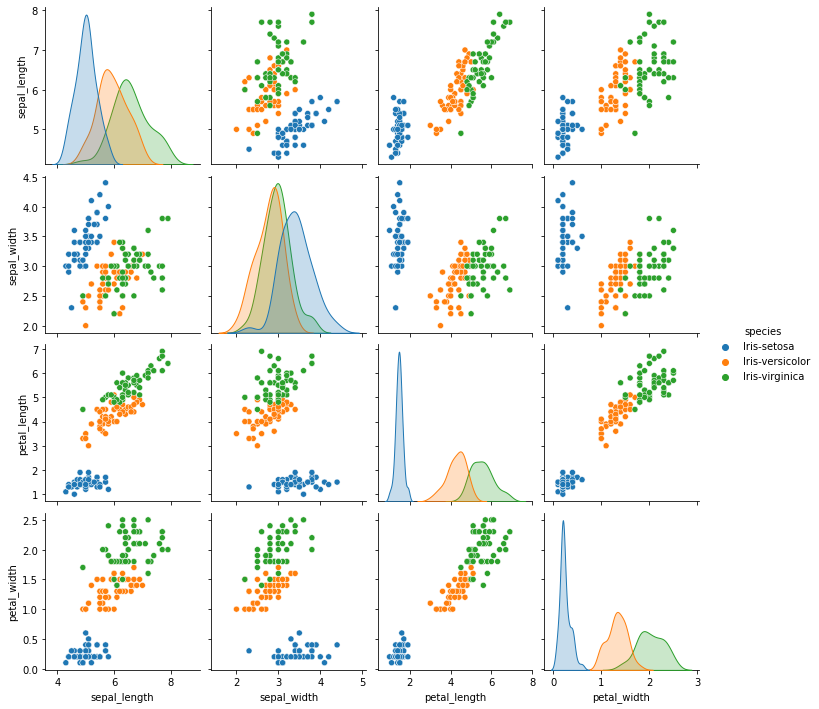

In [277]:
#Pairplot
sns.pairplot(df, hue="species")

In [278]:
#Scatterplot
colors=['red','yellow','blue']
species=['Iris-virginica','Iris-setosa','Iris-versicolor']

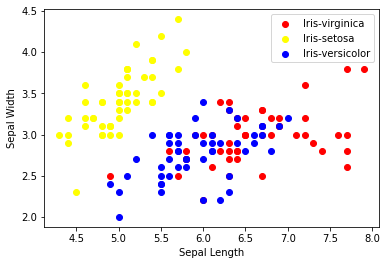

In [279]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x["sepal_length"],x["sepal_width"],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

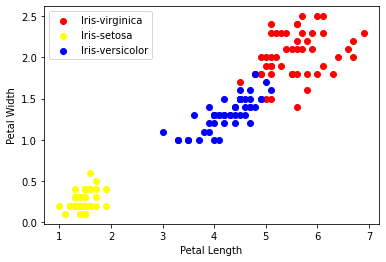

In [280]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x["petal_length"],x["petal_width"],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

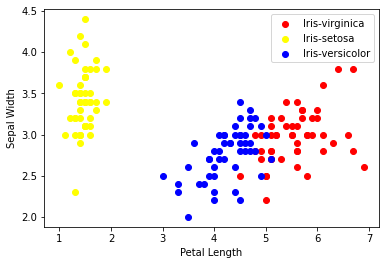

In [281]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x["petal_length"],x["sepal_width"],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

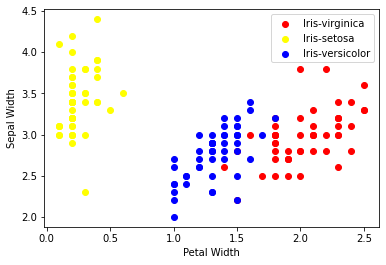

In [282]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x["petal_width"],x["sepal_width"],c=colors[i],label=species[i])
plt.xlabel("Petal Width")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

In [283]:
#Correlation matrix
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


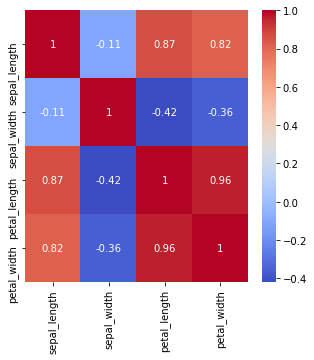

In [284]:
#Heatmap
corr =df.corr()
fig,ax =plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax, cmap ="coolwarm")
plt.show()

In [285]:
# x=df.iloc[:,:-1]
# y=df.iloc[:,-1]
# y
x =df.drop(columns=["species"])
y =df["species"]


In [286]:
# Train size :70
# Test size : 30
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.30)

# LOGISTIC REGRESSION


In [287]:
model1 = LogisticRegression(random_state=15, max_iter=1000)
model1.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=15)

In [288]:
predict_1 = model1.predict(x_test)

In [289]:
accuracy_1 = accuracy_score(predict_1, y_test)
print('The accuracy of the Random Forests is', accuracy_1)


The accuracy of the Random Forests is 1.0


In [290]:
accuracy_1s = model1.score(x_test,y_test)
round(accuracy_1s*100,2)

100.0

In [291]:
print(classification_report(y_test,predict_1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [292]:
confusion_matrix(y_test, predict_1)

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 13]], dtype=int64)

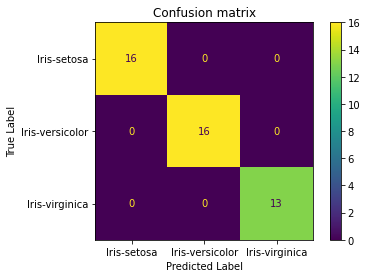

In [293]:
confusion_matrix(y_test,predict_1)
plot_confusion_matrix(model1,x_test,y_test)
plt.title("Confusion matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# RANDOM FOREST

In [294]:
reg = RandomForestClassifier(n_estimators = 100, random_state =42)

In [295]:
reg.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [296]:
predict_2 = reg.predict(x_test)

In [297]:
accuracy_2 = accuracy_score(predict_2, y_test)
print('The accuracy of the Random Forests is', accuracy_2)


The accuracy of the Random Forests is 1.0


In [298]:
accuracy_2s = reg.score(x_test,y_test)
round(accuracy_2s*100,2)

100.0

In [299]:
print(classification_report(y_test,predict_2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [300]:
confusion_matrix(y_test, predict_2)

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 13]], dtype=int64)

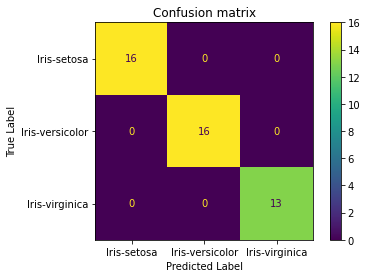

In [301]:
confusion_matrix(y_test,predict_2)
plot_confusion_matrix(reg,x_test,y_test)
plt.title("Confusion matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# K-Nearest Neighbours(KNN)

In [302]:
model2=KNeighborsClassifier() 
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [303]:
predict_3 = model2.predict(x_test)

In [304]:
accuracy_3 = accuracy_score(predict_3 ,y_test)

In [305]:
print('The accuracy of the KNN is',metrics.accuracy_score(predict_3 ,y_test))


The accuracy of the KNN is 1.0


In [306]:
accuracy_3s =model2.score(x_test,y_test)
round(accuracy_3*100,2)

100.0

In [307]:
print(classification_report(y_test,predict_3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [308]:
confusion_matrix(y_test, predict_3)

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 13]], dtype=int64)

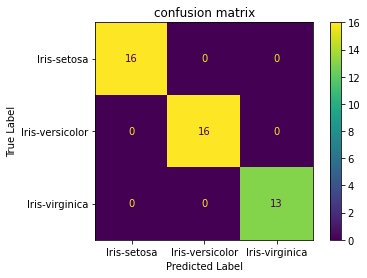

In [309]:
confusion_matrix(y_test,predict_3)
plot_confusion_matrix(model2,x_test,y_test)
plt.title('confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Decision tree(DT)

In [310]:
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [311]:
predict_4 = model3.predict(x_test)

In [312]:
accuracy_4 = accuracy_score(predict_4 ,y_test)

In [313]:
print('The accuracy of the Decision Tree is',metrics.accuracy_score(predict_4,y_test))


The accuracy of the Decision Tree is 0.9777777777777777


In [314]:
accuracy_4s =model3.score(x_test,y_test)
round(accuracy_4*100,2)

97.78

In [315]:
print(classification_report(y_test,predict_4))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [316]:
confusion_matrix(y_test, predict_4)

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  1, 12]], dtype=int64)

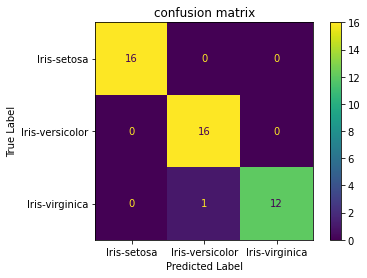

In [317]:
confusion_matrix(y_test,predict_4)
plot_confusion_matrix(model3,x_test,y_test)
plt.title('confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# NAIVE BAYES ALGORITHM

In [318]:
model4 = GaussianNB()
model4.fit(x_train, y_train)

GaussianNB()

In [319]:
predict_5 = model4.predict(x_test)

In [320]:
accuracy_5 = accuracy_score(predict_5 ,y_test)

In [321]:
print('The accuracy of the naivebayes is',metrics.accuracy_score(predict_5 ,y_test))

The accuracy of the naivebayes is 1.0


In [322]:
accuracy_5s =model4.score(x_test,y_test)
round(accuracy_5*100,2)

100.0

In [323]:
print(classification_report(y_test,predict_5))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [324]:
confusion_matrix(y_test, predict_5)

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 13]], dtype=int64)

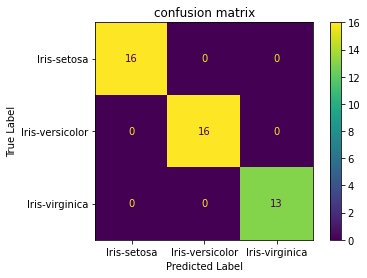

In [325]:
confusion_matrix(y_test,predict_5)
plot_confusion_matrix(model4,x_test,y_test)
plt.title('confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Support Vector Machine(SVM)

In [326]:
# Create an SVM classifier with a linear kernel
C = 1.0  # SVM regularization parameter
model5 = svm.SVC(kernel='linear', C=C)

In [327]:
model5.fit(x_train, y_train)

SVC(kernel='linear')

In [328]:
predict_6 = model5.predict(x_test)

In [329]:
accuracy_6 = accuracy_score(predict_6 ,y_test)

In [330]:
print('The accuracy of the naivebayes is',metrics.accuracy_score(predict_6 ,y_test))

The accuracy of the naivebayes is 1.0


In [331]:
accuracy_6s =model4.score(x_test,y_test)
round(accuracy_6*100,2)

100.0

In [332]:
print(classification_report(y_test,predict_6))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [333]:
confusion_matrix(y_test, predict_6)

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 13]], dtype=int64)

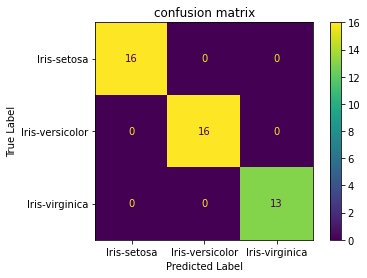

In [334]:
confusion_matrix(y_test,predict_5)
plot_confusion_matrix(model5,x_test,y_test)
plt.title('confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# COMPARISON OF MODELS

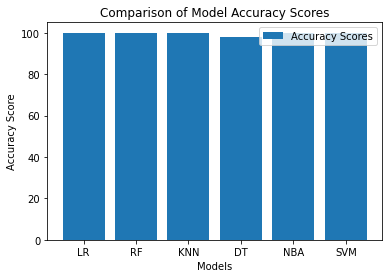

In [337]:
import matplotlib.pyplot as plt

# Accuracy scores of each model
models = ["LR","RF","KNN","DT","NBA","SVM"]
accuracy_scores = [100.0,100.0,100.0,97.78,100.0,100.0]

# Plotting the accuracy scores on a bar graph
plt.bar(models, accuracy_scores)

# Adding labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.legend(['Accuracy Scores'])

# Displaying the graph
plt.show()